## 3. How much plastic waste is mismanaged?  What about landfill or burning?

A stacked plot bar by year is probably the best way to convey this information. We are going to get it for 2019 which is the most recent year we have.

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_csv("../data/clean/totalsbyfates.csv")
df.head()

,year,location,plastic_end_of_life_fates,m_tons_plastic
0,2000,Canada,Incinerated,0.151097
1,2000,Canada,Landfilled,3.386902
2,2000,Canada,Littered,0.008696
3,2000,Canada,Mismanaged,0.485324
4,2000,Canada,Recycled,0.127029


First we check the distribution of plastic waste management in 2000 through a stacked bar plot

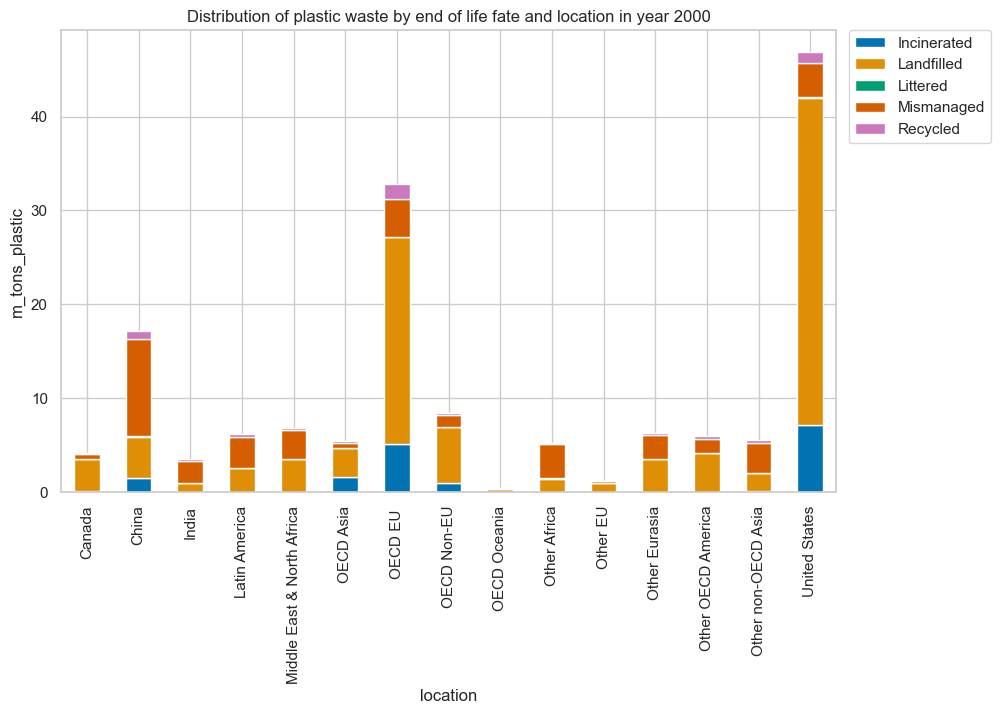

In [109]:
year = 2000
df_filtered = df[df['year'] == year]

grouped = df_filtered.groupby(['location', 'plastic_end_of_life_fates'])['m_tons_plastic'].sum().unstack()

ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right', borderaxespad=0)
ax.set_xlabel('location')
ax.set_ylabel('m_tons_plastic')
plt.title('Amount of plastic waste by end of life fate and location in year 2000')
plt.show()

Now we check the distribution of plastic waste management in 2019 through a stacked bar plot. This shows us that not only the generation of plastic waste has increased greatly over the last 20 years, but also that recycling hasn't catched up significantly in comparison.

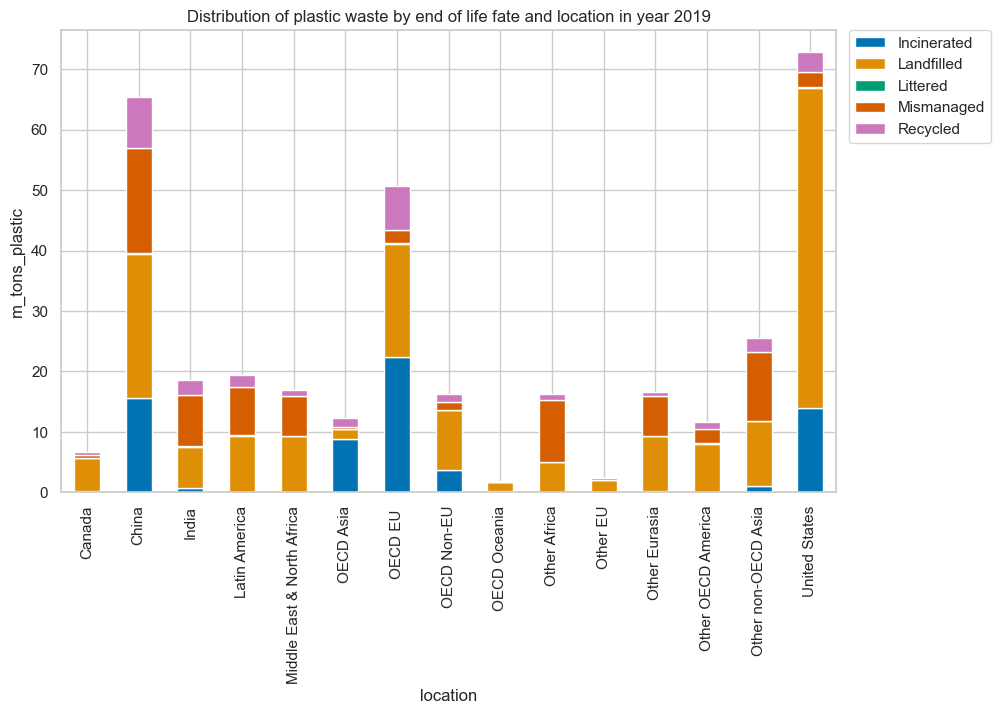

In [110]:
year = 2019
df_filtered = df[df['year'] == year]

grouped = df_filtered.groupby(['location', 'plastic_end_of_life_fates'])['m_tons_plastic'].sum().unstack()

ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right', borderaxespad=0)
ax.set_xlabel('location')
ax.set_ylabel('m_tons_plastic')
plt.title('Amount of of plastic waste by end of life fate and location in year 2019')
plt.show()

But what about the percentage? 
## 3. Which % of all used plastic is recycled?  What about landfill or burning?

How significant is the percentage of mismanaged, landfilled or burnt plastic waste? I computed another pair of stacked bar graphs, this time showing the percentage, for both the initial and final year of this study (2000 and 1019).




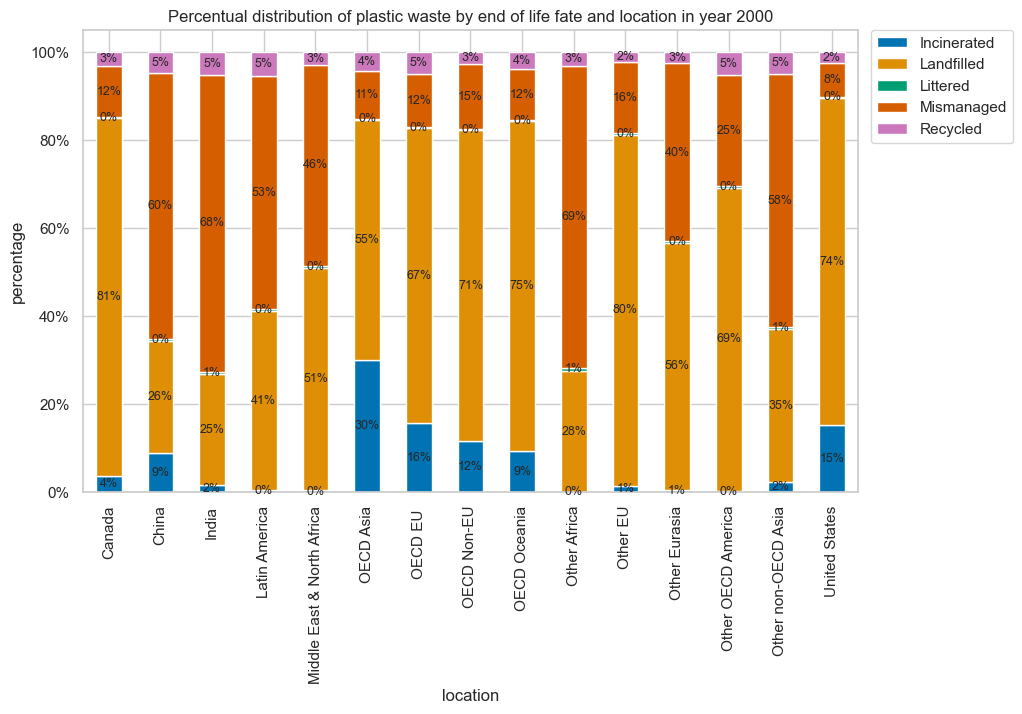

In [123]:
#year 2000 in percent with percentage numbers and correct names

year = 2000
df_filtered = df[df['year'] == year]

grouped = df_filtered.groupby(['location','plastic_end_of_life_fates'])['m_tons_plastic'].sum()

grouped_percent = grouped.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()

temp  = grouped_percent.copy()

temp = temp.droplevel(level=1).reset_index().set_index('location')

ax =temp.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right', borderaxespad=0)
ax.set_xlabel('location')
ax.set_ylabel('percentage')
plt.title('Percentual distribution of plastic waste by end of life fate and location in year 2000')

ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))


for patch in ax.containers:
    ax.bar_label(patch, labels=[f"{label:.0f}%" for label in patch.datavalues], label_type='center',fontsize=9)

    
plt.show()

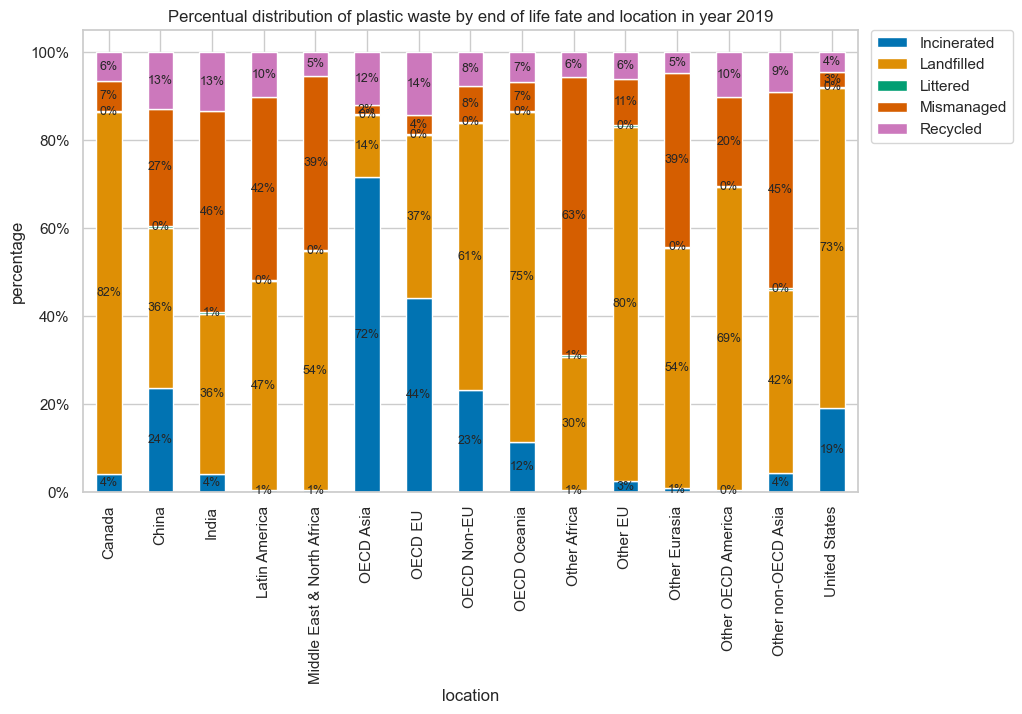

In [119]:
#year 2019 in percent with percentage numbers

year = 2019
df_filtered = df[df['year'] == year]

grouped = df_filtered.groupby(['location','plastic_end_of_life_fates'])['m_tons_plastic'].sum()

grouped_percent = grouped.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()

temp  = grouped_percent.copy()

temp = temp.droplevel(level=1).reset_index().set_index('location')

ax =temp.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right', borderaxespad=0)
ax.set_xlabel('location')
ax.set_ylabel('percentage')
plt.title('Percentual distribution of plastic waste by end of life fate and location in year 2019')

ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))


for patch in ax.containers:
    ax.bar_label(patch, labels=[f"{label:.0f}%" for label in patch.datavalues], label_type='center',fontsize=9)

    
plt.show()

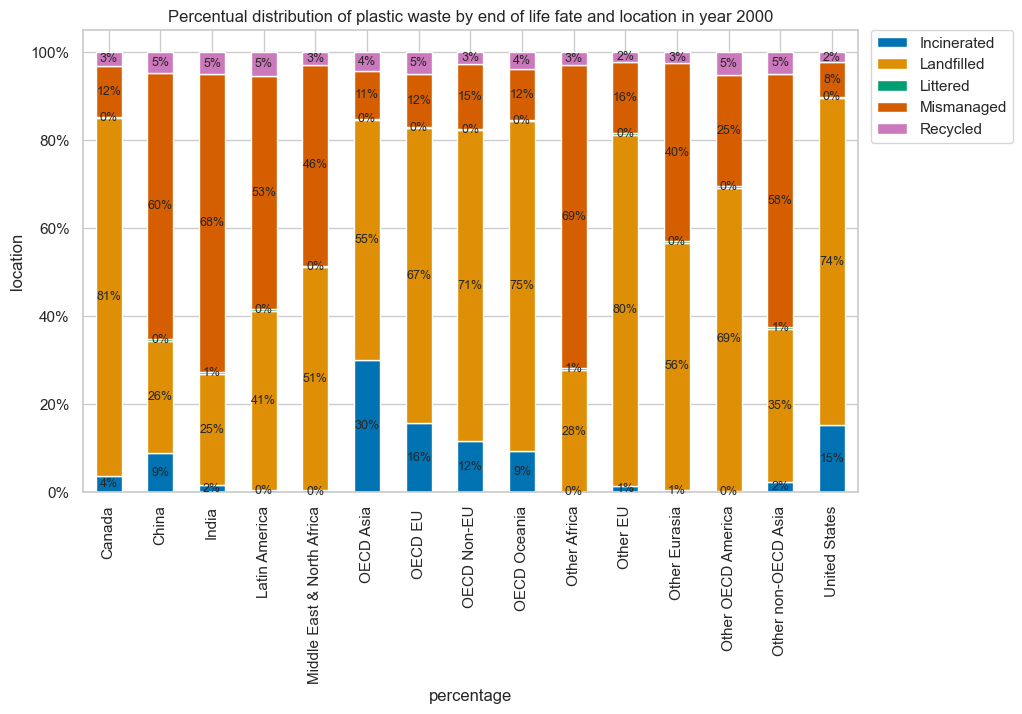

In [167]:
#year 2000 in percent with percentage numbers and correct names

# cambiar eje x por y
# cambiar colores

year = 2000
df_filtered = df[df['year'] == year]

grouped = df_filtered.groupby(['location','plastic_end_of_life_fates'])['m_tons_plastic'].sum()

grouped_percent = grouped.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()

temp  = grouped_percent.copy()

temp = temp.droplevel(level=1).reset_index().set_index('location')

ax =temp.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right', borderaxespad=0)
ax.set_ylabel('location')
ax.set_xlabel('percentage')
plt.title('Percentual distribution of plastic waste by end of life fate and location in year 2000')

ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))


for patch in ax.containers:
    ax.bar_label(patch, labels=[f"{label:.0f}%" for label in patch.datavalues], label_type='center',fontsize=9)

  
plt.show()

To improve visibility, let's visualize it horizontally

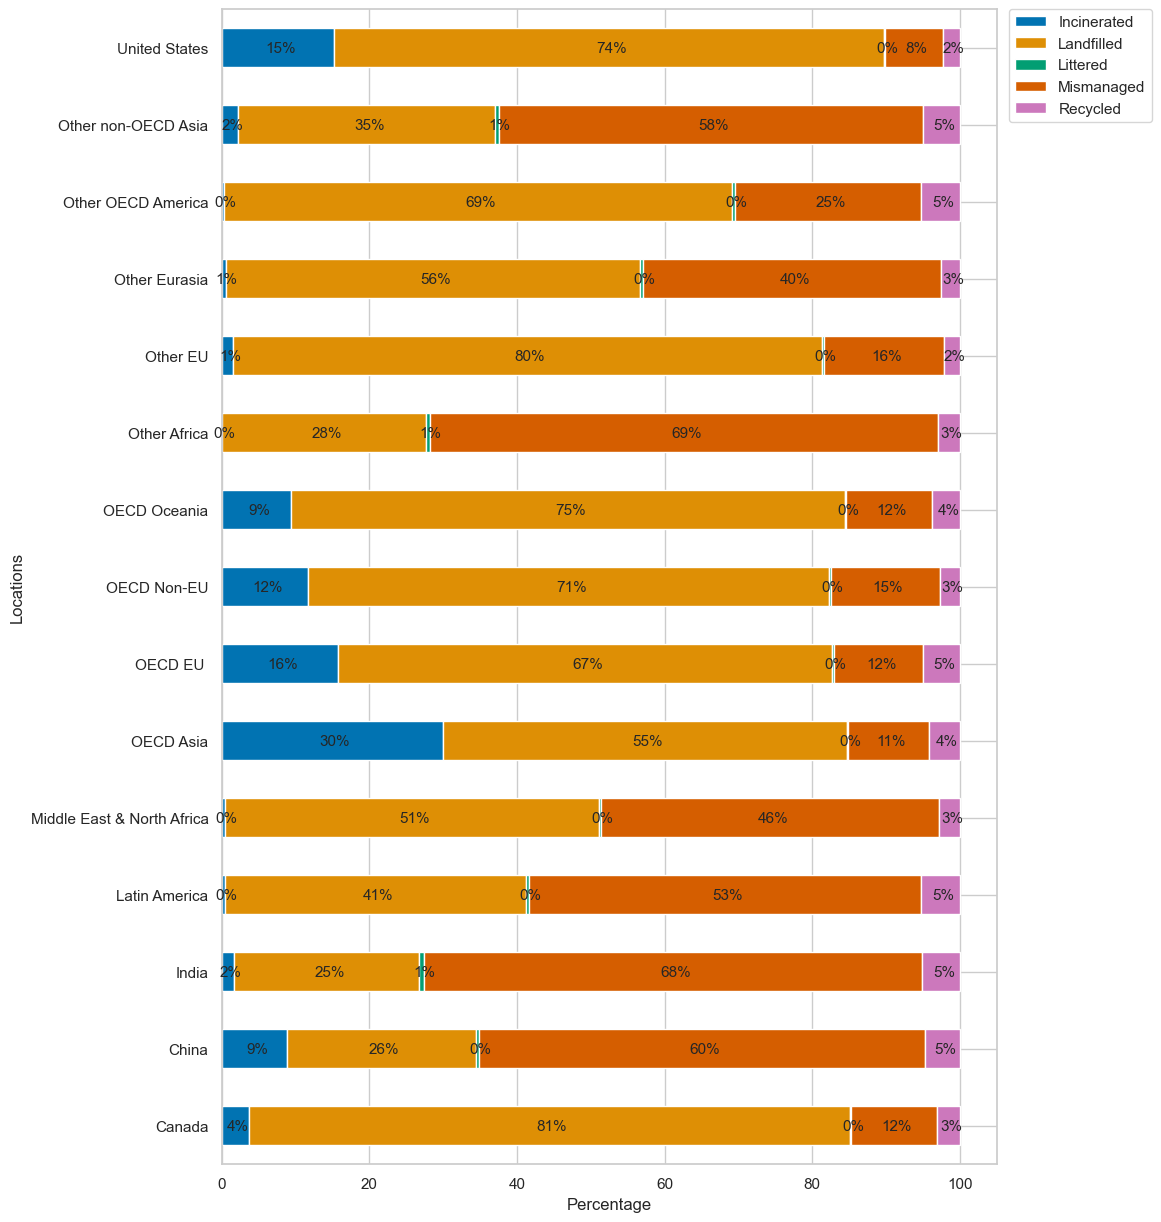

In [138]:

year = 2000
df_filtered = df[df['year'] == year]

grouped = df_filtered.groupby(['location', 'plastic_end_of_life_fates'])['m_tons_plastic'].sum()
grouped_percent = grouped.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()

temp  = grouped_percent.copy()

temp = temp.droplevel(level=1).reset_index().set_index('location')


ax = temp.plot(kind='barh', stacked=True, figsize=(10, 15))
ax.set_xlabel('Percentage')
ax.set_ylabel('Locations')
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right', borderaxespad=0)

for patch in ax.containers:
    ax.bar_label(patch, labels=[f"{label:.0f}%" for label in patch.datavalues], 
                 label_type='center', fontsize=11, padding=2)

plt.show()

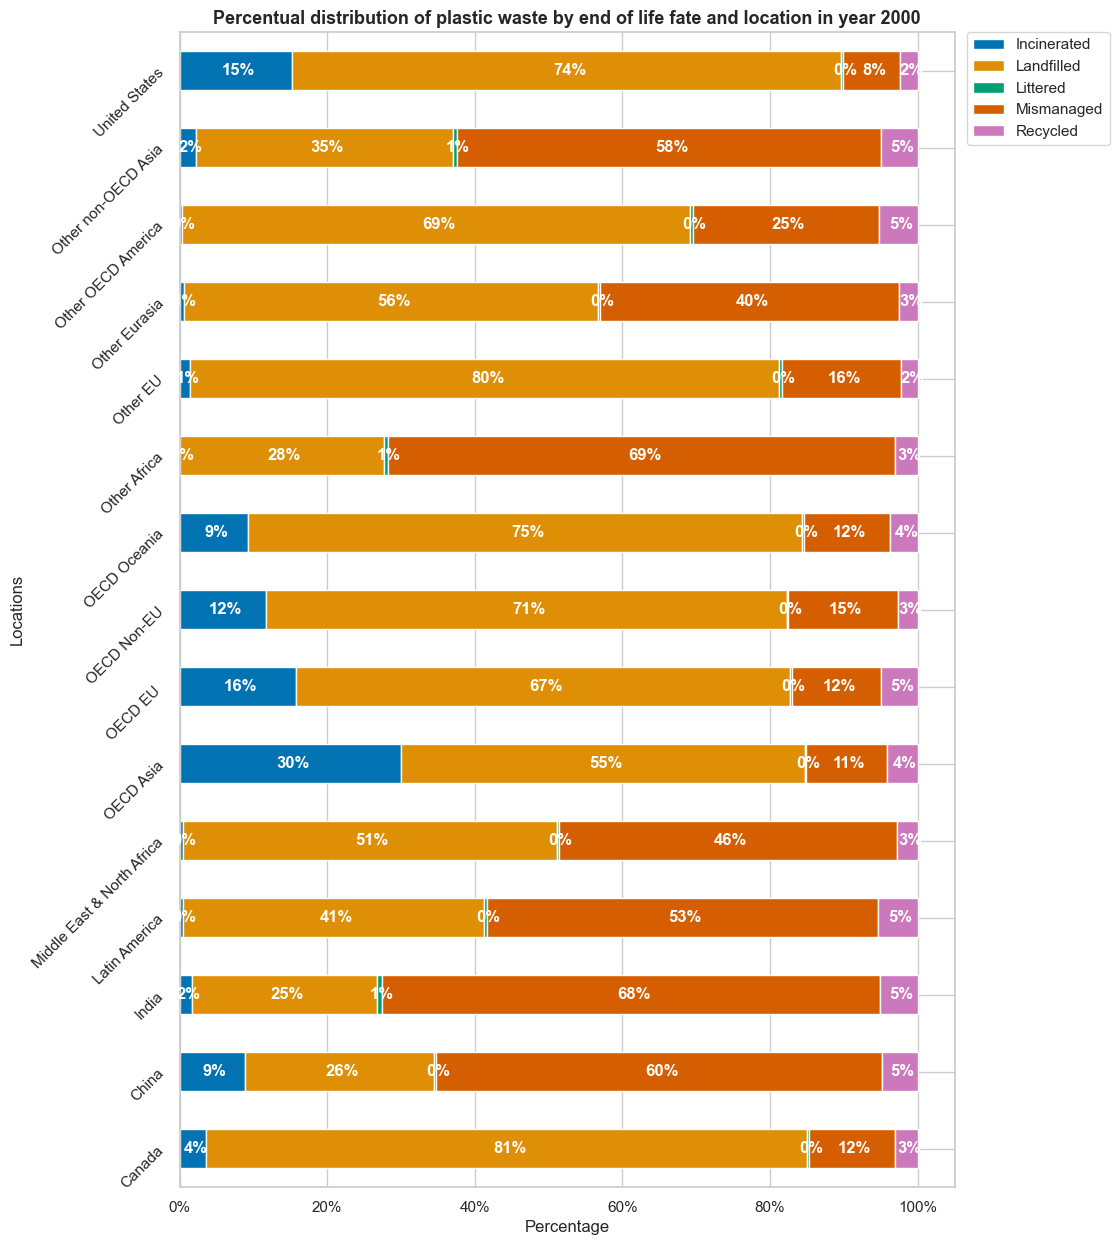

In [156]:

year = 2000
df_filtered = df[df['year'] == year]

grouped = df_filtered.groupby(['location', 'plastic_end_of_life_fates'])['m_tons_plastic'].sum()
grouped_percent = grouped.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()

temp  = grouped_percent.copy()

temp = temp.droplevel(level=1).reset_index().set_index('location')


ax = temp.plot(kind='barh', stacked=True, figsize=(10, 15))
ax.set_xlabel('Percentage')
ax.set_ylabel('Locations')
plt.yticks(rotation=45)
ax.xaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))
plt.title('Percentual distribution of plastic waste by end of life fate and location in year 2000', fontsize=13, weight = 'bold')

plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right', borderaxespad=0)

for patch in ax.containers:
    ax.bar_label(patch, labels=[f"{label:.0f}%" for label in patch.datavalues], 
                 label_type='center', fontsize=12, padding=2,color = 'w', weight = 'bold')

plt.show()



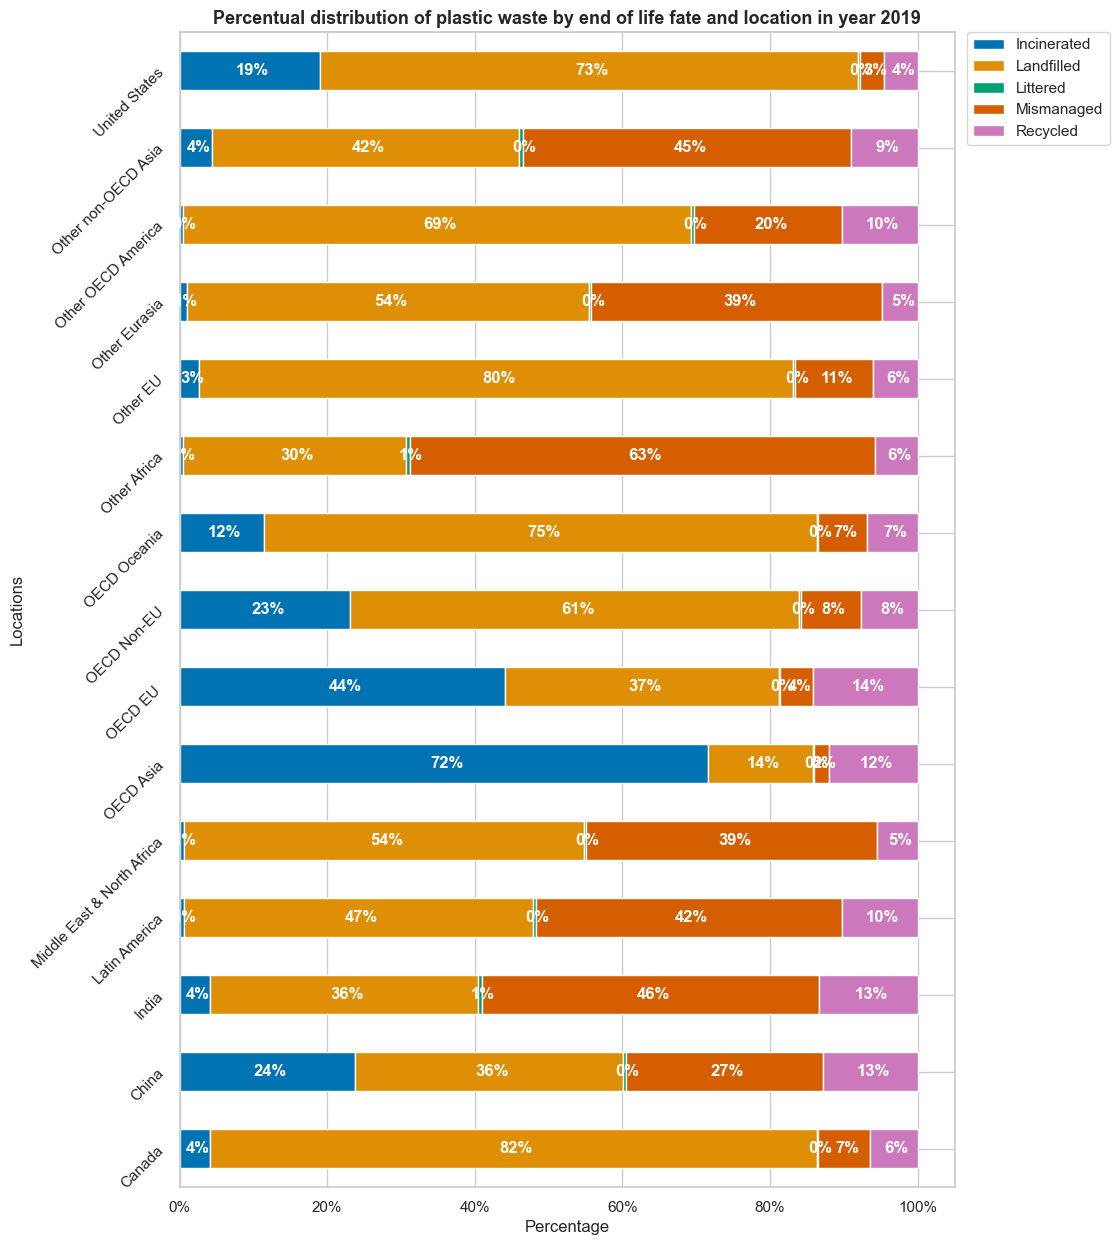

In [166]:
year = 2019
df_filtered = df[df['year'] == year]

grouped = df_filtered.groupby(['location', 'plastic_end_of_life_fates'])['m_tons_plastic'].sum()
grouped_percent = grouped.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()

temp  = grouped_percent.copy()

temp = temp.droplevel(level=1).reset_index().set_index('location')


ax = temp.plot(kind='barh', stacked=True, figsize=(10, 15))
ax.set_xlabel('Percentage')
ax.set_ylabel('Locations')
plt.yticks(rotation=45)
ax.xaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))
plt.title('Percentual distribution of plastic waste by end of life fate and location in year 2019', fontsize=13, weight = 'bold')

plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right', borderaxespad=0)

for patch in ax.containers:
    ax.bar_label(patch, labels=[f"{label:.0f}%" for label in patch.datavalues], 
                 label_type='center', fontsize=12, padding=2,color = 'w', weight = 'bold')

plt.show()

## 4. How did the % of recycled plastics improve in the EU in the last 20y?
Now let's see the evolution of OECD EU by checking the percentages per year

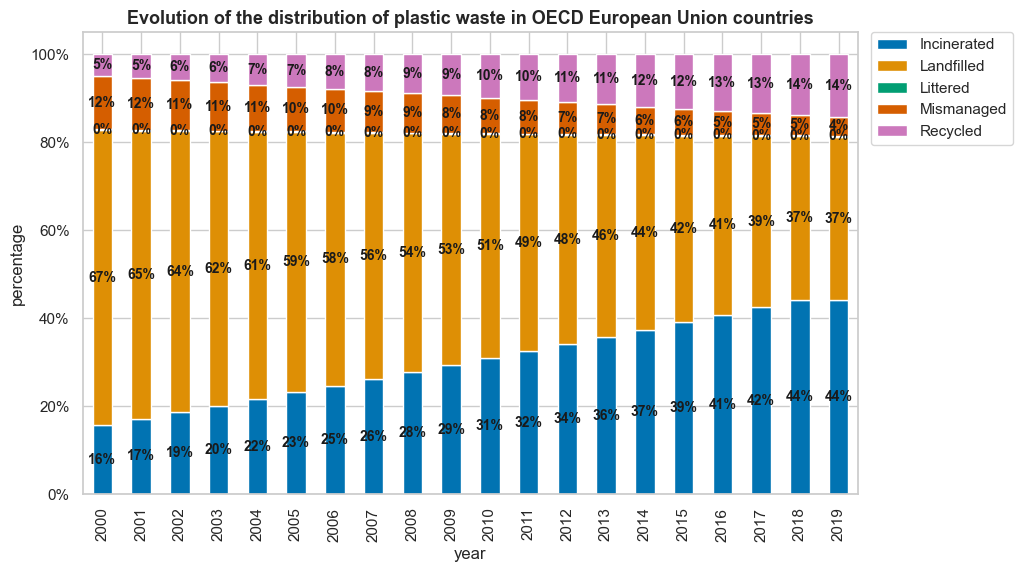

In [190]:
location = 'OECD EU '
df_filtered = df[df['location'] == 'OECD EU ']

grouped = df_filtered.groupby(['year','plastic_end_of_life_fates'])['m_tons_plastic'].sum()

grouped_percent = grouped.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()

temp  = grouped_percent.copy()

temp = temp.droplevel(level=1).reset_index().set_index('year')

ax =temp.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right', borderaxespad=0)
ax.set_xlabel('year')
ax.set_ylabel('percentage')
plt.title('Evolution of the distribution of plastic waste in OECD European Union countries',fontsize=13, weight = 'bold')

ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))


for patch in ax.containers:
    ax.bar_label(patch, labels=[f"{label:.0f}%" for label in patch.datavalues], label_type='center',fontsize=10,weight = 'bold', color = 'k')

  
plt.show()

## 5. But did the increase in recycle compensate for the increase in generation of plastic waste? 

Let's check it with an evolution graph with the absolutes.

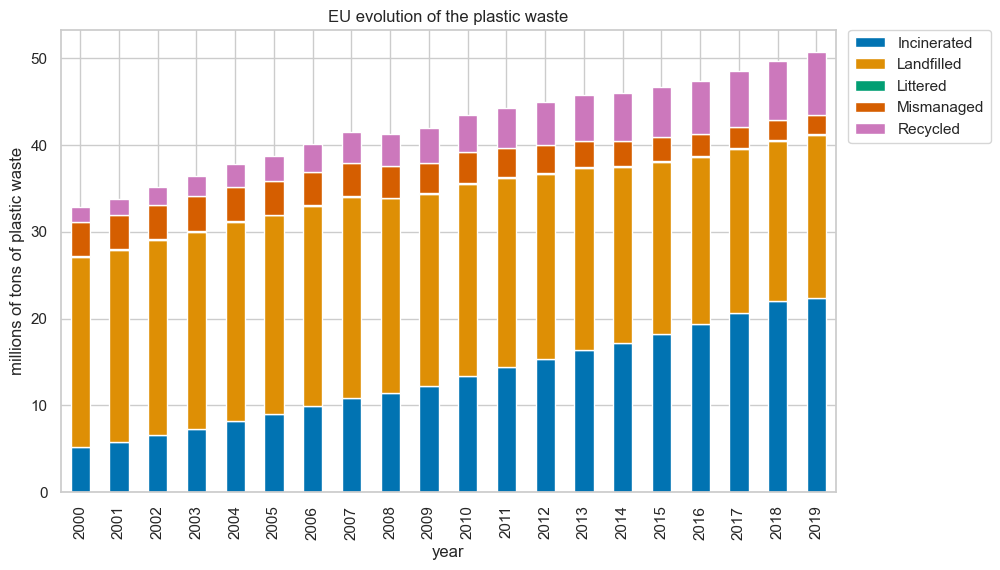

In [197]:
location = 'OECD EU '
df_filtered = df[df['location'] == 'OECD EU ']

grouped = df_filtered.groupby(['year', 'plastic_end_of_life_fates'])['m_tons_plastic'].sum().unstack()

ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right', borderaxespad=0)
ax.set_xlabel('year')
ax.set_ylabel('millions of tons of plastic waste')
plt.title('EU evolution of the plastic waste')
plt.show()